In [2]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt

In [291]:
N = 100
B = 0
mu = 0.33 # g mu
J = 2
k = 1 # Boltzmann
T = 30
state = np.zeros((N)) # spins up ( 1 ) , down ( 0 )
S = np.zeros((N),float)
U = np.zeros(999)
#random.seed () # Seed generator
t = np.linspace(0,999,999)



def energy(S):
    FirstTerm = 0
    SecondTerm = 0 
    
    for i in range (0 , N): 
        
        if i == 99:
            FirstTerm +=(-J)*S[i]*S[0]
        else:
            FirstTerm += (-J)*S[i]* S[i + 1]
    for i in range (0 ,N-1):
        SecondTerm += S[i]
        SecondTerm *= -B*mu
    return ( FirstTerm + SecondTerm ) 



In [292]:
for b in range (0,N):
    state[b] = -1
    
ES = energy(state)
print(ES)


-200.0


In [293]:
AVR = np.zeros(0)

MAG = np.zeros(0)

vt = np.zeros(0)

mt = np.zeros(0)

anal = np.zeros(0)


for T in np.linspace(0.001,8,50):
    for c in range (0,4994):
        test = np.array(state)
        r =  np.random.randint(0, 100)

        test[r] *= -1
        ET = energy(test)

        p = np.exp((ES-ET)/(k*T))
        if p >= random.uniform(0,1):

            state = np.array(test)
            ES = ET
        if c%5 == 0:
            U[int(c/5)] = ES

        if c > 4000:
        #    if abs(U[int(c/5)]-U[int(c/5 - 1)])<0.01 and abs(U[int(c/5)]-U[int(c/5 - 2)])<0.01 and abs(U[int(c/5)]-U[int(c/5 - 3)])<0.01:
            AVR = np.append(AVR,ES)
            MAG = np.append(MAG,abs(sum(state)))
                #print (AVR)
                #print(c)              
    avr = sum(AVR)/len(AVR)
    vt = np.append(vt,avr)
    mag = sum(MAG)/len(MAG)
    mt = np.append(mt, mag)
    print('avr:',avr) 
    print('mag:',mag)
    print('------------------------')      
    anal= np.append(anal,-N*J*np.tanh(2*J/(k*T)))

avr: -200.0
mag: 100.0
------------------------
avr: -200.0
mag: 100.0
------------------------
avr: -200.0
mag: 100.0
------------------------
avr: -200.0
mag: 100.0
------------------------
avr: -200.0
mag: 100.0
------------------------
avr: -200.0
mag: 100.0
------------------------
avr: -198.85714285714286
mag: 95.30628686519925
------------------------
avr: -197.92346424974824
mag: 87.49320241691844
------------------------
avr: -196.16336578270113
mag: 82.08548729998881
------------------------
avr: -194.49909365558912
mag: 75.23907351460221
------------------------
avr: -191.1841069303305
mag: 68.89096402087338
------------------------
avr: -188.40147700570662
mag: 65.96727089627392
------------------------
avr: -186.07297234487567
mag: 61.676194902781006
------------------------
avr: -182.53661343691556
mag: 57.65616458063588
------------------------
avr: -179.90788855320577
mag: 54.490231621349444
------------------------
avr: -177.04279959718025
mag: 52.256419939577036
-----

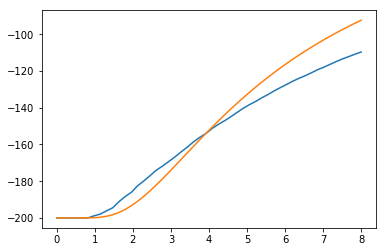

In [296]:
plt.plot(np.linspace(0.001,8,50),vt) 
plt.plot(np.linspace(0.001,8,50),anal)
plt.show()

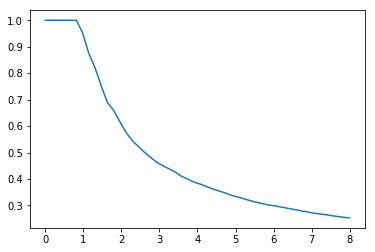

In [298]:
plt.plot(np.linspace(0.001,8,50),mt/100) 
plt.show()